<a href="https://colab.research.google.com/github/SamerHasn/My-projects/blob/master/Applied_Econometric_Time_Series_Walter_Enders_4e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

<b>Applied Econometric Time Series</b> 

4th Edition 
<br/>
<br/> <b>Walter Enders</b>
<br/>
<br/> Coded by:
<br/> 
[Samer Hasn](https://www.linkedin.com/in/samerhasn/)

</center>


# **Chapter 2:  Stationary Time-Series Models**




## **1. Installing and Loading Packages and Data**

In [ ]:
install.packages("texreg") # To organize models summry
install.packages("forecast") # For ACF/PACF Calc.
install.packages("gridExtra") #  To equivalently edit graphical parameters by par() for ggplot2
library(ggplot2)
library(readxl)
library(gridExtra)

In [ ]:
# Downloading Data

url <- "http://time-series.net/yahoo_site_admin/assets/docs/quarterly.7775706.xls"
destfile <- "quarterly.xls"
curl::curl_download(url, destfile)
quarterly <- read_excel(destfile)

In [ ]:
# ggplot2 Theme Spec.

mytheme <- theme(
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  panel.background = element_blank(),
  legend.position="bottom",
  axis.text = element_text(size = 12, face="bold"),
  plot.title = element_text(hjust = 0.5, face = "bold")
  )

In [ ]:
# ACF and PACF Calculation Function

myacf <- function(data, h = 12,y.breaks = c(-.5 ,-.25 ,0 ,.25 ,.5 ,.75 ,1) ,
                    aspect.ratio = 1  ,title="" ,gtheme = theme()) {

  # Organizing Data

s.acf <- forecast::Acf(data ,lag.max= h ,plot=F)
s.acf <- with(s.acf ,data.frame(lag,acf))
s.acf <- data.frame(cbind(s.acf ,"Autocorrelations"))
names(s.acf) <- c("lag","acf","type")

s.pacf <- forecast::Pacf(data ,lag.max = h ,plot=F) 
s.pacf <- with(s.pacf, data.frame(lag,acf));
s.pacf <- data.frame(c(rbind(c(0,1),s.pacf)))
s.pacf <- data.frame(cbind(s.pacf,"PACF"))
names(s.pacf) <- c("lag","acf","type")

pa <- data.frame(rbind(s.acf,s.pacf))
names(pa) <- c("lags","cf","type")

  # Plot Spec.

ggplot(pa ,aes(x = lags ,y = cf ,fill = type))+
  geom_bar(position = "dodge", stat = "identity")+
  scale_fill_grey(start = 0.2, end = 0.8) +
  labs(fill = "" ,y = "" ,x = "" ,title = title)+
  scale_x_continuous(breaks = c(0:h))+
  scale_y_continuous(breaks = y.breaks ,limits = c(-.5,1) , expand = c(0, 0))+
  theme_bw()+
  geom_line(y = 0)+
  theme(aspect.ratio = aspect.ratio)+
  gtheme
}

In [ ]:
# Multi-lags Ljung-Box Test Orginizer

  # Ljung-Box Test Info. Extractor

lb.test <- function(data ,lags = c(4,8,12),p.value=T,type = "Ljung-Box") {

  q <- data.frame(0,0)

  for(i in seq(c(4,8,12))){

    q[i,] <- c(Box.test(data,lags[i],type)$statistic, Box.test(data,lags[i],type)$p.value)

  }

names(q) <- c("statistic","p.value")
return(q)

}

  # Ljung-Box Test Info. Union

lb.cat <- function(lb.test){

  qcat <- matrix(0,nrow = nrow(lb.test),ncol = 1)

  for(i in 1:nrow(lb.test)){

      qcat[i,] <- paste0(sprintf("%.2f (%.3f)",lb.test[i,1],lb.test[i,2]))

  }

  return(qcat)

}

##  **2. Estimates of the Interest Rate Spread**

### **2.1.  Preparing Data**




In [30]:
# Interest Rate Spread Data

s <- quarterly$r5 - quarterly$Tbill
s <- ts(s,
        start = c(1960, 1),
        end = c(2012, 4),
        frequency = 4)

### **2.2.  Identification Satge**




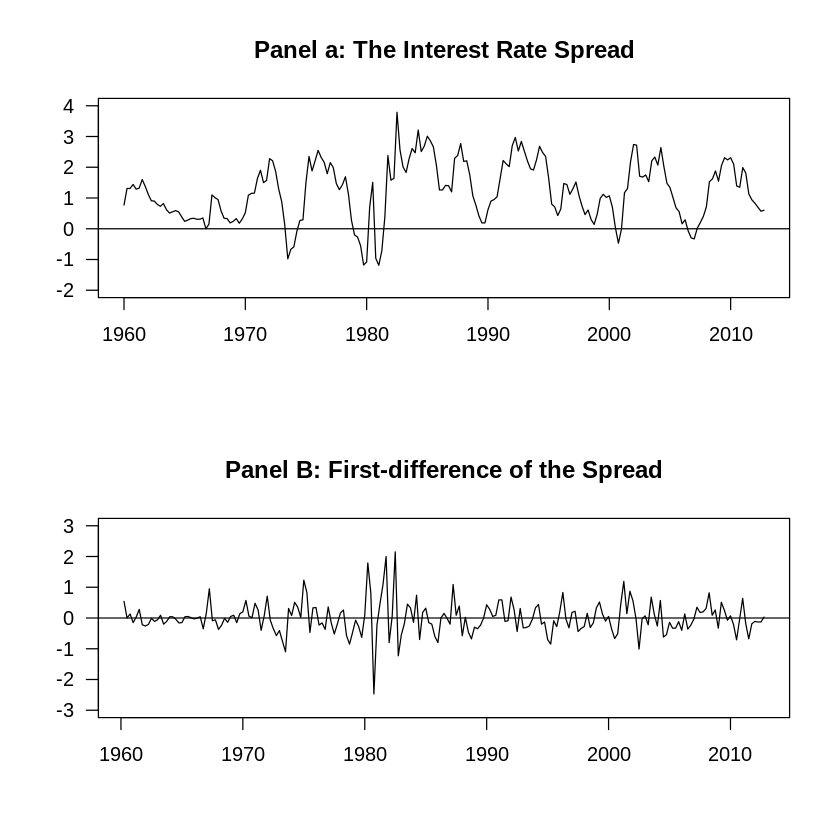

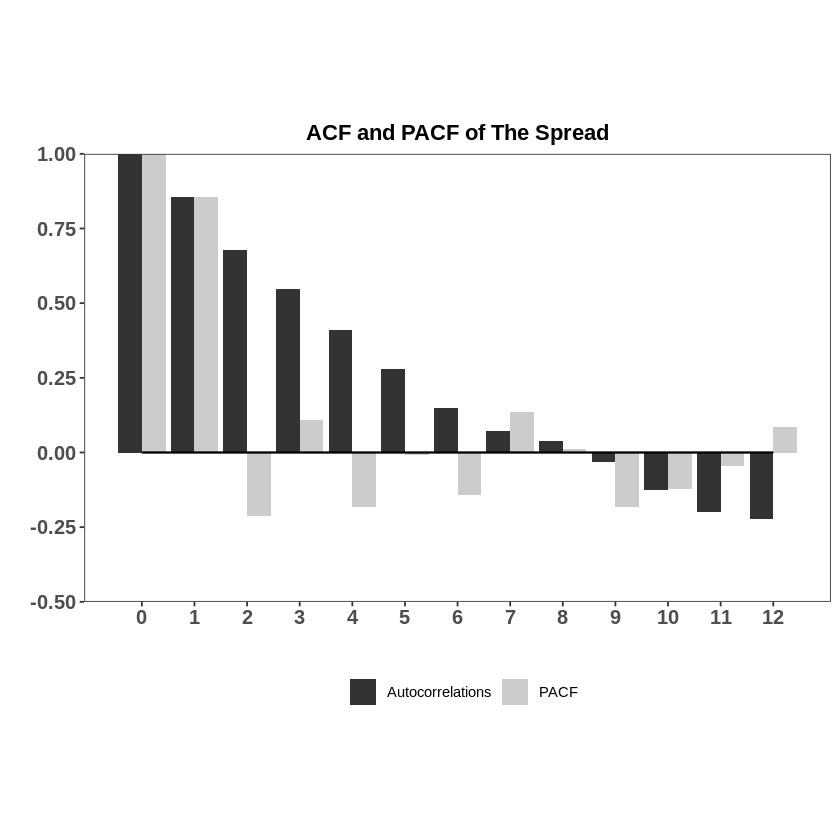

In [31]:
  # Series Plots

par(mfrow = c(2,1),las=1)

plot(s,
     main = "Panel a: The Interest Rate Spread",
      xlab = "", ylab= "", ylim = c(-2,4)); abline(a=0,b=0)

ds <- diff(s)
plot(ds,
     main="Panel B: First-difference of the Spread",
      xlab="", ylab= "", ylim = c(-3,3)); abline(a=0,b=0)

  # ACF & PACF

myacf(s ,12 , ,.6 ,"ACF and PACF of The Spread" ,mytheme)

### **2.3.  Models Estimate**




In [48]:
 # AR(7)

ar7 <- arima(s,c(7,0,0), method = "ML")
ar7.ssr <- ssr <- sum((ar7$residuals)^2)
ar7.q <- lb.test(ar7$residuals)

In [33]:
 # AR(6)

ar6 <- arima(s,c(6,0,0), method = "ML")
ar6.ssr <- ssr <- sum((ar6$residuals)^2)
ar6.q <- lb.test(ar6$residuals)

In [34]:
 # AR(2)

ar2 <- arima(s,c(2,0,0), method = "ML")
ar2.ssr <- ssr <- sum((ar2$residuals)^2)
ar2.q <- lb.test(ar2$residuals)

In [35]:
# AR(1:2&7)

ar27 <- arima(s,c(7,0,0),
                     fixed = c(NA,NA,0,0,0,0,NA,NA),transform.pars = F,
                     method = "ML")
ar27.ssr <- ssr <- sum((ar27$residuals)^2)
ar27.q <- lb.test(ar27$residuals)

In [36]:
# ARMA(1,1)

arma11 <- arima(s,c(1,0,1),
                     method = "ML")
arma11.ssr <- ssr <- sum((arma11$residuals)^2)
arma11.q <- lb.test(arma11$residuals)

In [37]:
# ARMA(2,1)

arma21 <- arima(s,c(2,0,1),
                     method = "ML")
arma21.ssr <- ssr <- sum((arma21$residuals)^2)
arma21.q <- lb.test(arma21$residuals)

In [38]:
# ARMA(2,(1,7))

arma217 <- arima(s,c(2,0,7),
                     fixed = c(NA,NA,NA,0,0,0,0,0,NA,NA),transform.pars = F,
                     method = "ML")
arma217.ssr <- ssr <- sum((arma217$residuals)^2)
arma217.q <- lb.test(arma217$residuals)

### **2.4.  Models Summary**




In [39]:
cat("Table 2.4 Estimates of the Interest Rate Spread",

  texreg::screenreg(list(ar7,ar6,ar2,ar27,arma11,arma21,arma217),
                  center=T,
                 
                  custom.model.names = 
                    c("AR(7)","AR(6)","AR(2)","p=1,2,7",
                      "ARMA(1,1)","ARMA(2,1)","p=2;q=(1,7)"),
                  
                  omit.coef = "(ma2)|(ma3)|(ma4)|(ma4)|(ma5)|(ma6)",
                  
                  custom.coef.names= 
                    c("\U03B1\u2081","\U03B1\u2082","\U03B1\u2083",
                      "\U03B1\u2084","\U03B1\u2085","\U03B1\u2086",
                      "\U03B1\u2087",
                      "\U03B1\u2080","\U03B2\U2081","\U03B2\U2087"),
                  reorder.coef= c(8,1,2,3,4,5,6,7,9,10),
                  
                  custom.gof.rows= list(
                    
                    "SSR"= c(ar7.ssr,ar6.ssr,ar2.ssr,ar27.ssr,
                             arma11.ssr,arma21.ssr,arma217.ssr),
                    
                    "Q4" = c(ar7.q[1,1],ar6.q[1,1],
                             ar2.q[1,1],ar27.q[1,1],
                             arma11.q[1,1],arma21.q[1,1],
                             arma217.q[1,1]),
                    
                    "Q8" = c(ar7.q[2,1],ar6.q[2,1],
                             ar2.q[2,1],ar27.q[2,1],
                             arma11.q[2,1],arma21.q[2,1],
                             arma217.q[2,1]),
                    
                    "Q12" = c(ar7.q[3,1],ar6.q[3,1],
                             ar2.q[3,1],ar27.q[3,1],
                             arma11.q[3,1],arma21.q[3,1],
                             arma217.q[3,1])
                  ),reorder.gof = c(1,5,6,2,3,4),
                  include.nobs = F,
                  include.loglik = F,
                  custom.note="*** p.value < 0.001; ** p.value < 0.01; * p.value < 0.05"
  )
)

Table 2.4 Estimates of the Interest Rate Spread 
     AR(7)       AR(6)       AR(2)       p=1,2,7     ARMA(1,1)   ARMA(2,1)   p=2;q=(1,7)
----------------------------------------------------------------------------------------
α₀     1.20 ***    1.20 ***    1.19 ***    1.20 ***    1.19 ***    1.19 ***    1.19 *** 
      (0.17)      (0.15)      (0.18)      (0.16)      (0.18)      (0.20)      (0.19)    
α₁     1.11 ***    1.09 ***    1.04 ***    1.03 ***    0.76 ***    0.41 ***    0.34 **  
      (0.07)      (0.07)      (0.07)      (0.07)      (0.05)      (0.12)      (0.12)    
α₂    -0.44 ***   -0.42 ***   -0.22 **    -0.20 **                 0.32 **     0.40 *** 
      (0.10)      (0.10)      (0.07)      (0.07)                  (0.11)      (0.12)    
α₃     0.39 ***    0.36 ***                0.00                                         
      (0.10)      (0.10)                                                                
α₄    -0.29 **    -0.24 *                  0.00              

## **3. Seasonality**

### **3.1. Preparing Data**

In [40]:
# M1 Data

m1 <- quarterly$M1NSA
m1t <- ts(m1,
        start = c(1960, 1),
        end = c(2012, 4),
        frequency=4)
m1d <- diff(log(m1))

date <- seq(as.Date("1960/1/1"), as.Date("2012/12/31"), by = "quarter")

m1 <- data.frame(date,m1)
m1d <- data.frame(date[-1],m1d)
names(m1d) <- c("date","m1d")

m1sd <- diff(m1d$m1d,4) # To Seasonally Difference M1 Growth

### **3.2. Identification M1 Series**

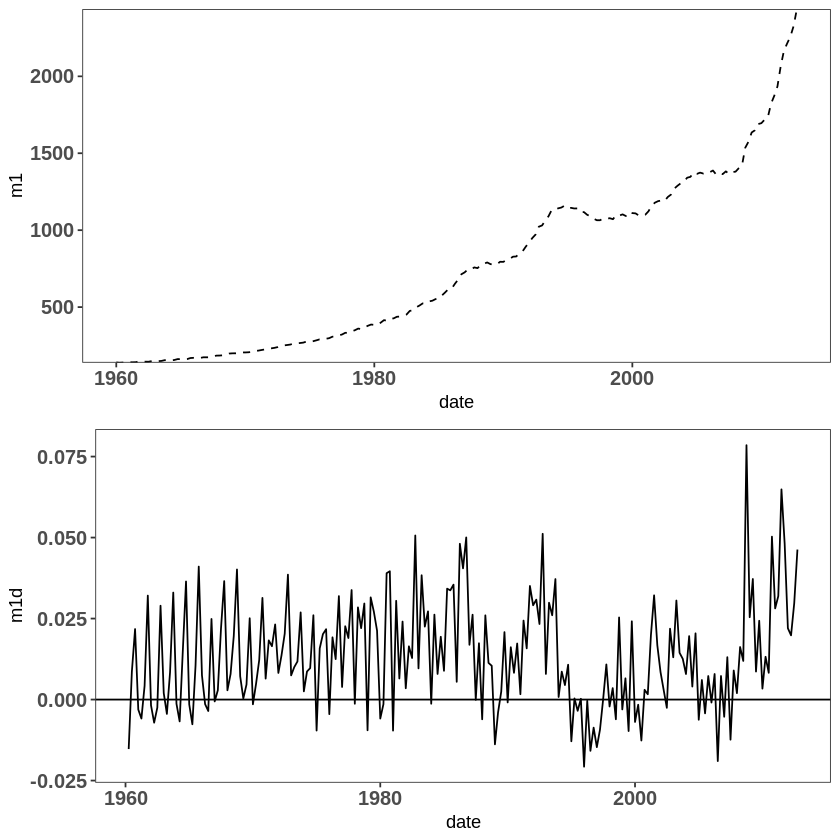

In [41]:
# M1

m1dts <- ggplot()+
  geom_line(data = m1d, aes(x=date, y = m1d), linetype = 1)+
  theme_bw()+ 
  mytheme+
  geom_hline(yintercept = 0)

# M1 Growth

m1ts <- ggplot()+
  geom_line(data = m1, aes(x = date, y = m1), linetype = 2)+
  theme_bw()+
  mytheme+
  scale_y_continuous(expand = c(0,0))

gridExtra::grid.arrange(m1ts, m1dts, nrow = 2)

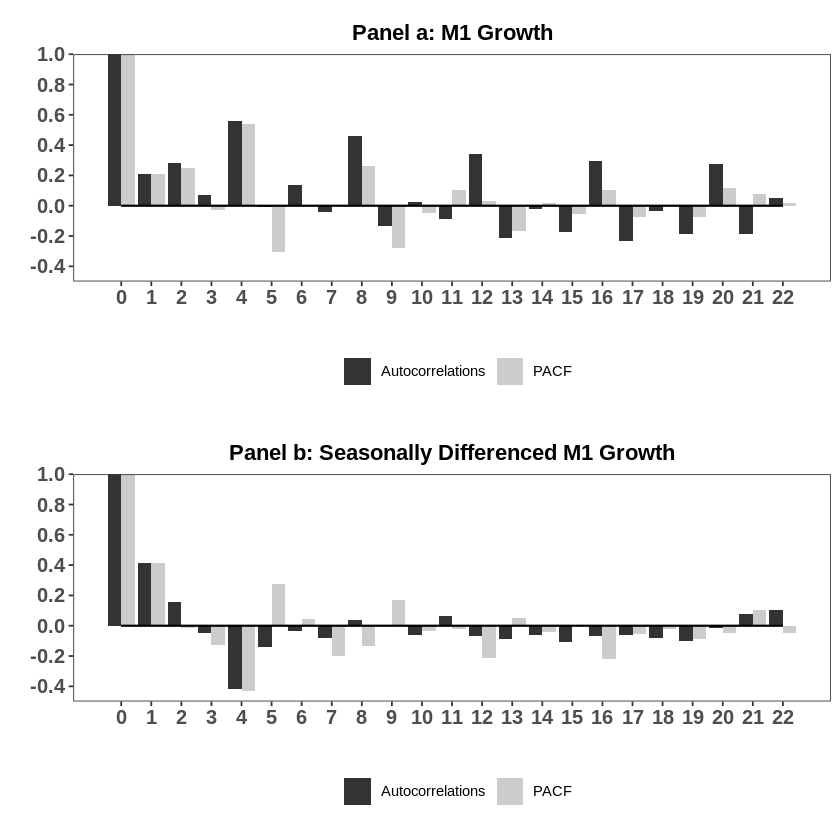

In [42]:
m1dp <- myacf(m1d$m1d ,22 , c(-.4,-.2 ,0 ,.2 ,.4 ,.6 ,.8 ,1), .3,"Panel a: M1 Growth",mytheme)

m1dsp <- myacf(m1sd ,22 , c(-.4,-.2 ,0 ,.2 ,.4 ,.6 ,.8 ,1), .3,"Panel b: Seasonally Differenced M1 Growth", mytheme)

gridExtra::grid.arrange(m1dp, m1dsp, nrow = 2)

### **3.3 SARIMA Models Estimate**

In [43]:
# Model 1: AR(1) with Seasonal MA

sarma1 <- arima(log(m1$m1),c(1,1,4),
                fixed = c(NA,0,0,0,NA),
                seasonal = list(order= c(0,1,0), period=4),
                transform.pars=F,
                include.mean=F,
                method = "ML")

sarma1.ssr <- sum((sarma1$residuals)^2)
sarma1.q <- lb.test(sarma1$residuals)
sarma1.q <- lb.cat(sarma1.q)

p <- exp(predict(sarma1,12)$pred)

sarma1$coef[2] <- NA # To fit sreencreg function well

In [44]:
# Model 2: Multiplicative Autoregressive

sarma2 <- arima(m1sd,c(1,0,0),
                seasonal = list(order= c(1,0,0), period=4),
                transform.pars=F,
                include.mean=F,
                method = "ML")

sarma2.ssr <- sum((sarma2$residuals)^2)
sarma2.q <- lb.test(sarma2$residuals)
sarma2.q <- lb.cat(sarma2.q)

In [45]:
# Model 3: Multiplicative Moving Average

sarma3 <- arima(m1sd,c(0,0,1),
                seasonal = list(order= c(0,0,1), period=4),
                transform.pars=F,
                include.mean=F,
                method = "ML")

sarma3.ssr <- sum((sarma3$residuals)^2)
sarma3.q <- lb.test(sarma3$residuals)
sarma3.q <- lb.cat(sarma3.q)

### **3.4 Models Summary**

In [46]:

cat("Table 2.5 Three Models of Money Growth",

  texreg::screenreg(list(sarma1,sarma2,sarma3),
                 
                  custom.model.names = 
                    c("   Model 1" , "   Model 2" , "   Model 3"),   

                  ##              

                 omit.coef = "(ar2)|(ar3)|(ma2)|(ma3)",
                 custom.coef.names = c("\U03B1\u2081" ,"\U03B2\u2081" ,
                                       "\U03B2\u2084" ,"\U03B1\U2084" ,"\U03B2\U2084"),
                 reorder.coef = c(1,4,2,3),

                  ##

                  custom.gof.rows= list(
                    "SSR"= c(sarma1.ssr,sarma2.ssr,sarma3.ssr),
                    "Q4" = c(sarma1.q[1], sarma2.q[1], sarma3.q[1]), 
                    "Q8" = c(sarma1.q[2], sarma2.q[2], sarma3.q[2]),
                    "Q12" = c(sarma1.q[3], sarma2.q[3], sarma3.q[3])),
                  reorder.gof = c(1,5,6,2,3,4),
                  include.nobs = F,
                  include.loglik = F,
                  column.spacing = 2,
                  custom.note = "*** p.value < 0.001; ** p.value < 0.01; * p.value < 0.05"
  )
)

Table 2.5 Three Models of Money Growth 
        Model 1           Model 2           Model 3      
---------------------------------------------------------
α₁       0.55 ***          0.51 ***                      
        (0.06)            (0.06)                         
α₄                        -0.52 ***                      
                          (0.06)                         
β₁                                           0.42 ***    
                                            (0.05)       
β₄      -0.76 ***                           -0.71 ***    
        (0.05)                              (0.06)       
---------------------------------------------------------
SSR      0.03              0.03              0.03        
AIC  -1263.13          -1236.98          -1241.28        
BIC  -1253.13          -1226.98          -1231.28        
Q4       2.77 (0.596)      4.86 (0.302)     26.23 (0.000)
Q8       4.75 (0.784)     16.62 (0.034)     29.08 (0.000)
Q12     16.12 (0.186)     27.65 

### **3.4. Forecasting**

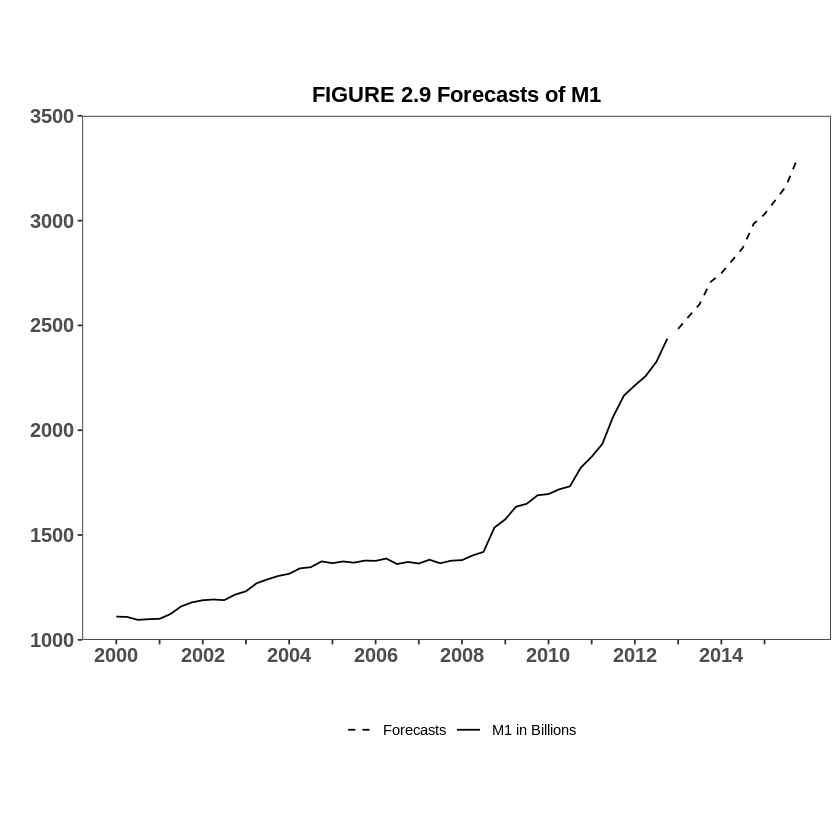

In [47]:
 # Preparing Plotting Data

pd <- seq(as.Date("2013/1/1"), as.Date("2015/12/31"), by = "quarter")
pf <- data.frame(pd ,p ,"Forecasts")
names(pf) <- c("date" ,"m1" ,"type")

m1.2000 <- m1[date>="2000-1-1",]
m1.2000 <- cbind(m1.2000,"type" = "M1 in Billions")

m1p <- data.frame(rbind(m1.2000, pf))

  # ggplot Spec.

ggplot(data=m1p ,aes(x=date,y=m1, linetype = type))+
  geom_line()+

  scale_x_continuous(breaks = seq(as.Date("2000/1/1"), as.Date("2015/12/31"), by = "year"),
                     labels=c("2000","","2002","","2004","",
                               "2006","","2008","","2010","","2012","","2014",""))+
  scale_y_continuous(limits = c(1000,3500), expand = c(0, 0))+
  scale_linetype_manual(name="", values=c("dashed","solid"))+

  labs(fill = "" ,y="" ,x="" , title = "FIGURE 2.9 Forecasts of M1")+
  theme_bw()+
  mytheme+
  theme(aspect.ratio=.7)